In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: CAH
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


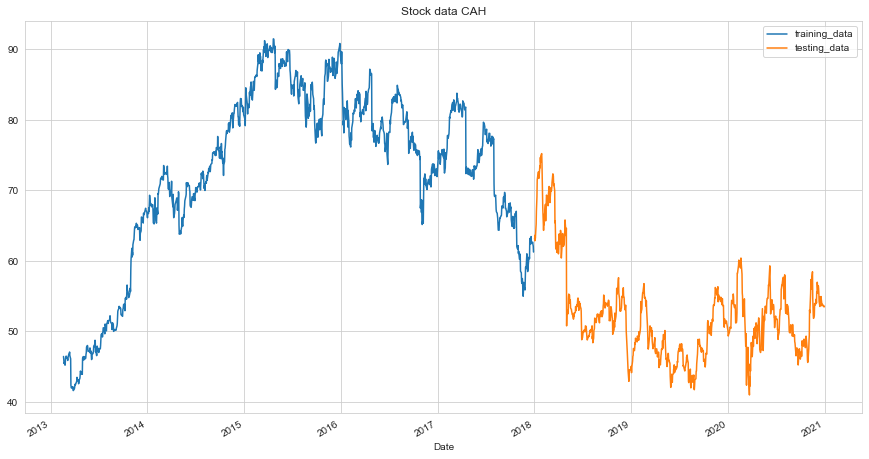

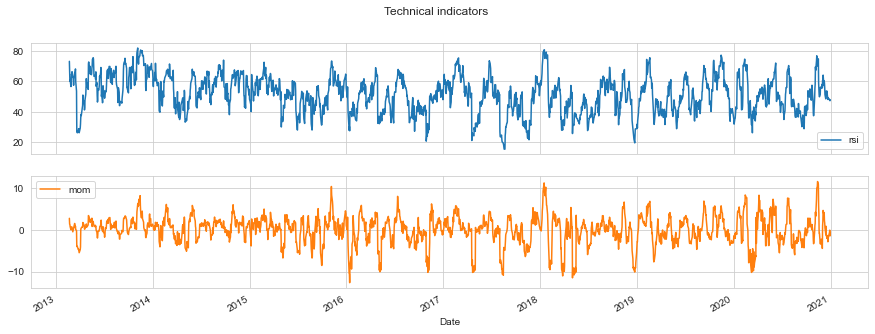

In [2]:
stock_name = 'cah'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1303.21, duration: 0:00:00.210059
episode: 2/2000, episode end value: 1205.53, duration: 0:00:00.190035
episode: 3/2000, episode end value: 1228.48, duration: 0:00:00.202045
episode: 4/2000, episode end value: 1338.79, duration: 0:00:00.199053
episode: 5/2000, episode end value: 1384.49, duration: 0:00:00.195044
episode: 6/2000, episode end value: 1313.43, duration: 0:00:00.218050
episode: 7/2000, episode end value: 1376.49, duration: 0:00:00.225049
episode: 8/2000, episode end value: 1338.22, duration: 0:00:00.225056
episode: 9/2000, episode end value: 1316.69, duration: 0:00:00.218043
episode: 10/2000, episode end value: 1397.36, duration: 0:00:00.208054
episode: 11/2000, episode end value: 1321.71, duration: 0:00:00.218619
episode: 12/2000, episode end value: 1267.62, duration: 0:00:00.220695
episode: 13/2000, episode end value: 1241.73, duration: 0:00:00.216673
episode: 14/2000, episode end value: 1265.34, duration: 0:00:00.206412
episode: 15/200

episode: 117/2000, episode end value: 1320.82, duration: 0:00:00.223065
episode: 118/2000, episode end value: 1263.98, duration: 0:00:00.221039
episode: 119/2000, episode end value: 1346.02, duration: 0:00:00.208048
episode: 120/2000, episode end value: 1343.66, duration: 0:00:00.208047
episode: 121/2000, episode end value: 1326.56, duration: 0:00:00.202061
episode: 122/2000, episode end value: 1319.94, duration: 0:00:00.230021
episode: 123/2000, episode end value: 1278.66, duration: 0:00:00.225065
episode: 124/2000, episode end value: 1255.07, duration: 0:00:00.221062
episode: 125/2000, episode end value: 1375.46, duration: 0:00:00.223062
episode: 126/2000, episode end value: 1338.27, duration: 0:00:00.233039
episode: 127/2000, episode end value: 1399.31, duration: 0:00:00.197057
episode: 128/2000, episode end value: 1307.54, duration: 0:00:00.233046
episode: 129/2000, episode end value: 1327.42, duration: 0:00:00.214030
episode: 130/2000, episode end value: 1312.16, duration: 0:00:00

episode: 231/2000, episode end value: 1308.60, duration: 0:00:00.272060
episode: 232/2000, episode end value: 1311.10, duration: 0:00:00.269057
episode: 233/2000, episode end value: 1336.69, duration: 0:00:00.262059
episode: 234/2000, episode end value: 1308.80, duration: 0:00:00.263059
episode: 235/2000, episode end value: 1291.25, duration: 0:00:00.275063
episode: 236/2000, episode end value: 1286.73, duration: 0:00:00.283063
episode: 237/2000, episode end value: 1301.69, duration: 0:00:00.258058
episode: 238/2000, episode end value: 1350.58, duration: 0:00:00.254054
episode: 239/2000, episode end value: 1323.24, duration: 0:00:00.257061
episode: 240/2000, episode end value: 1332.60, duration: 0:00:00.265058
episode: 241/2000, episode end value: 1364.28, duration: 0:00:00.259063
episode: 242/2000, episode end value: 1310.13, duration: 0:00:00.266064
episode: 243/2000, episode end value: 1316.86, duration: 0:00:00.260056
episode: 244/2000, episode end value: 1408.89, duration: 0:00:00

episode: 345/2000, episode end value: 1310.98, duration: 0:00:00.360087
episode: 346/2000, episode end value: 1332.24, duration: 0:00:00.324072
episode: 347/2000, episode end value: 1307.71, duration: 0:00:00.360082
episode: 348/2000, episode end value: 1308.40, duration: 0:00:00.337078
episode: 349/2000, episode end value: 1273.67, duration: 0:00:00.373086
episode: 350/2000, episode end value: 1309.61, duration: 0:00:00.364081
episode: 351/2000, episode end value: 1358.50, duration: 0:00:00.324069
episode: 352/2000, episode end value: 1300.91, duration: 0:00:00.436100
episode: 353/2000, episode end value: 1310.04, duration: 0:00:00.419697
episode: 354/2000, episode end value: 1279.31, duration: 0:00:00.456101
episode: 355/2000, episode end value: 1277.97, duration: 0:00:00.424099
episode: 356/2000, episode end value: 1331.10, duration: 0:00:00.460103
episode: 357/2000, episode end value: 1293.83, duration: 0:00:00.447761
episode: 358/2000, episode end value: 1408.51, duration: 0:00:00

episode: 459/2000, episode end value: 1337.13, duration: 0:00:00.530119
episode: 460/2000, episode end value: 1307.80, duration: 0:00:00.558643
episode: 461/2000, episode end value: 1304.92, duration: 0:00:00.486138
episode: 462/2000, episode end value: 1279.55, duration: 0:00:00.462103
episode: 463/2000, episode end value: 1270.36, duration: 0:00:00.471111
episode: 464/2000, episode end value: 1234.83, duration: 0:00:00.488109
episode: 465/2000, episode end value: 1375.80, duration: 0:00:00.451765
episode: 466/2000, episode end value: 1320.98, duration: 0:00:00.437099
episode: 467/2000, episode end value: 1346.12, duration: 0:00:00.489112
episode: 468/2000, episode end value: 1341.55, duration: 0:00:00.379087
episode: 469/2000, episode end value: 1391.74, duration: 0:00:00.399089
episode: 470/2000, episode end value: 1306.80, duration: 0:00:00.424095
episode: 471/2000, episode end value: 1371.23, duration: 0:00:00.459101
episode: 472/2000, episode end value: 1407.90, duration: 0:00:00

episode: 573/2000, episode end value: 1422.44, duration: 0:00:00.405088
episode: 574/2000, episode end value: 1315.83, duration: 0:00:00.455103
episode: 575/2000, episode end value: 1326.37, duration: 0:00:00.464111
episode: 576/2000, episode end value: 1309.34, duration: 0:00:00.470106
episode: 577/2000, episode end value: 1321.14, duration: 0:00:00.468108
episode: 578/2000, episode end value: 1346.35, duration: 0:00:00.459102
episode: 579/2000, episode end value: 1288.48, duration: 0:00:00.563128
episode: 580/2000, episode end value: 1520.57, duration: 0:00:00.438100
episode: 581/2000, episode end value: 1273.10, duration: 0:00:00.474114
episode: 582/2000, episode end value: 1283.55, duration: 0:00:00.469102
episode: 583/2000, episode end value: 1245.70, duration: 0:00:00.428097
episode: 584/2000, episode end value: 1292.57, duration: 0:00:00.402094
episode: 585/2000, episode end value: 1367.28, duration: 0:00:00.330069
episode: 586/2000, episode end value: 1333.59, duration: 0:00:00

episode: 687/2000, episode end value: 1337.70, duration: 0:00:00.534126
episode: 688/2000, episode end value: 1324.94, duration: 0:00:00.488106
episode: 689/2000, episode end value: 1295.39, duration: 0:00:00.470106
episode: 690/2000, episode end value: 1270.95, duration: 0:00:00.507112
episode: 691/2000, episode end value: 1397.80, duration: 0:00:00.418089
episode: 692/2000, episode end value: 1336.34, duration: 0:00:00.469103
episode: 693/2000, episode end value: 1307.82, duration: 0:00:00.510116
episode: 694/2000, episode end value: 1313.15, duration: 0:00:00.428102
episode: 695/2000, episode end value: 1317.46, duration: 0:00:00.403093
episode: 696/2000, episode end value: 1424.31, duration: 0:00:00.479107
episode: 697/2000, episode end value: 1313.67, duration: 0:00:00.429094
episode: 698/2000, episode end value: 1288.86, duration: 0:00:00.385088
episode: 699/2000, episode end value: 1275.92, duration: 0:00:00.472110
episode: 700/2000, episode end value: 1341.12, duration: 0:00:00

episode: 801/2000, episode end value: 1274.25, duration: 0:00:00.443104
episode: 802/2000, episode end value: 1333.53, duration: 0:00:00.434093
episode: 803/2000, episode end value: 1298.98, duration: 0:00:00.489110
episode: 804/2000, episode end value: 1291.20, duration: 0:00:00.535125
episode: 805/2000, episode end value: 1337.82, duration: 0:00:00.491112
episode: 806/2000, episode end value: 1317.66, duration: 0:00:00.487110
episode: 807/2000, episode end value: 1360.75, duration: 0:00:00.454101
episode: 808/2000, episode end value: 1325.90, duration: 0:00:00.442100
episode: 809/2000, episode end value: 1403.91, duration: 0:00:00.481136
episode: 810/2000, episode end value: 1365.76, duration: 0:00:00.401091
episode: 811/2000, episode end value: 1284.44, duration: 0:00:00.500112
episode: 812/2000, episode end value: 1353.59, duration: 0:00:00.460109
episode: 813/2000, episode end value: 1407.99, duration: 0:00:00.445101
episode: 814/2000, episode end value: 1313.87, duration: 0:00:00

episode: 915/2000, episode end value: 1312.67, duration: 0:00:00.396085
episode: 916/2000, episode end value: 1318.91, duration: 0:00:00.457102
episode: 917/2000, episode end value: 1283.01, duration: 0:00:00.466104
episode: 918/2000, episode end value: 1284.30, duration: 0:00:00.516115
episode: 919/2000, episode end value: 1325.84, duration: 0:00:00.470100
episode: 920/2000, episode end value: 1444.25, duration: 0:00:00.462107
episode: 921/2000, episode end value: 1287.06, duration: 0:00:00.590130
episode: 922/2000, episode end value: 1259.18, duration: 0:00:00.474109
episode: 923/2000, episode end value: 1290.08, duration: 0:00:00.414098
episode: 924/2000, episode end value: 1352.43, duration: 0:00:00.466106
episode: 925/2000, episode end value: 1353.02, duration: 0:00:00.451095
episode: 926/2000, episode end value: 1318.43, duration: 0:00:00.468103
episode: 927/2000, episode end value: 1324.17, duration: 0:00:00.441099
episode: 928/2000, episode end value: 1307.20, duration: 0:00:00

episode: 1029/2000, episode end value: 1302.26, duration: 0:00:00.414094
episode: 1030/2000, episode end value: 1308.65, duration: 0:00:00.418093
episode: 1031/2000, episode end value: 1414.14, duration: 0:00:00.356080
episode: 1032/2000, episode end value: 1348.74, duration: 0:00:00.396094
episode: 1033/2000, episode end value: 1329.17, duration: 0:00:00.443097
episode: 1034/2000, episode end value: 1426.32, duration: 0:00:00.389088
episode: 1035/2000, episode end value: 1352.50, duration: 0:00:00.453103
episode: 1036/2000, episode end value: 1300.16, duration: 0:00:00.485109
episode: 1037/2000, episode end value: 1281.86, duration: 0:00:00.517115
episode: 1038/2000, episode end value: 1341.30, duration: 0:00:00.436099
episode: 1039/2000, episode end value: 1334.06, duration: 0:00:00.384087
episode: 1040/2000, episode end value: 1283.87, duration: 0:00:00.486115
episode: 1041/2000, episode end value: 1273.12, duration: 0:00:00.442095
episode: 1042/2000, episode end value: 1425.47, dur

episode: 1142/2000, episode end value: 1288.03, duration: 0:00:00.590138
episode: 1143/2000, episode end value: 1350.40, duration: 0:00:00.463099
episode: 1144/2000, episode end value: 1325.18, duration: 0:00:00.516117
episode: 1145/2000, episode end value: 1353.57, duration: 0:00:00.520117
episode: 1146/2000, episode end value: 1304.53, duration: 0:00:00.523766
episode: 1147/2000, episode end value: 1302.10, duration: 0:00:00.472108
episode: 1148/2000, episode end value: 1289.82, duration: 0:00:00.589134
episode: 1149/2000, episode end value: 1282.36, duration: 0:00:00.546619
episode: 1150/2000, episode end value: 1340.66, duration: 0:00:00.565014
episode: 1151/2000, episode end value: 1364.04, duration: 0:00:00.533120
episode: 1152/2000, episode end value: 1277.78, duration: 0:00:00.529120
episode: 1153/2000, episode end value: 1281.76, duration: 0:00:00.550127
episode: 1154/2000, episode end value: 1275.86, duration: 0:00:00.502116
episode: 1155/2000, episode end value: 1259.24, dur

episode: 1255/2000, episode end value: 1313.02, duration: 0:00:00.462107
episode: 1256/2000, episode end value: 1279.69, duration: 0:00:00.468106
episode: 1257/2000, episode end value: 1271.49, duration: 0:00:00.513122
episode: 1258/2000, episode end value: 1276.04, duration: 0:00:00.468583
episode: 1259/2000, episode end value: 1276.78, duration: 0:00:00.469107
episode: 1260/2000, episode end value: 1258.54, duration: 0:00:00.402093
episode: 1261/2000, episode end value: 1265.33, duration: 0:00:00.461106
episode: 1262/2000, episode end value: 1223.83, duration: 0:00:00.414092
episode: 1263/2000, episode end value: 1257.55, duration: 0:00:00.465109
episode: 1264/2000, episode end value: 1244.16, duration: 0:00:00.394093
episode: 1265/2000, episode end value: 1355.12, duration: 0:00:00.356080
episode: 1266/2000, episode end value: 1296.63, duration: 0:00:00.453099
episode: 1267/2000, episode end value: 1389.93, duration: 0:00:00.404093
episode: 1268/2000, episode end value: 1325.47, dur

episode: 1368/2000, episode end value: 1437.31, duration: 0:00:00.393088
episode: 1369/2000, episode end value: 1332.05, duration: 0:00:00.400090
episode: 1370/2000, episode end value: 1381.12, duration: 0:00:00.389089
episode: 1371/2000, episode end value: 1321.78, duration: 0:00:00.464106
episode: 1372/2000, episode end value: 1290.27, duration: 0:00:00.481109
episode: 1373/2000, episode end value: 1343.39, duration: 0:00:00.529435
episode: 1374/2000, episode end value: 1284.83, duration: 0:00:00.453909
episode: 1375/2000, episode end value: 1276.01, duration: 0:00:00.394091
episode: 1376/2000, episode end value: 1271.60, duration: 0:00:00.457101
episode: 1377/2000, episode end value: 1337.48, duration: 0:00:00.467107
episode: 1378/2000, episode end value: 1283.78, duration: 0:00:00.444097
episode: 1379/2000, episode end value: 1276.74, duration: 0:00:00.470106
episode: 1380/2000, episode end value: 1280.29, duration: 0:00:00.419095
episode: 1381/2000, episode end value: 1352.08, dur

episode: 1481/2000, episode end value: 1289.11, duration: 0:00:00.574130
episode: 1482/2000, episode end value: 1377.35, duration: 0:00:00.545122
episode: 1483/2000, episode end value: 1324.59, duration: 0:00:00.468105
episode: 1484/2000, episode end value: 1287.73, duration: 0:00:00.497113
episode: 1485/2000, episode end value: 1309.87, duration: 0:00:00.412091
episode: 1486/2000, episode end value: 1322.71, duration: 0:00:00.466106
episode: 1487/2000, episode end value: 1332.78, duration: 0:00:00.452104
episode: 1488/2000, episode end value: 1349.91, duration: 0:00:00.459106
episode: 1489/2000, episode end value: 1333.98, duration: 0:00:00.445099
episode: 1490/2000, episode end value: 1299.74, duration: 0:00:00.463105
episode: 1491/2000, episode end value: 1317.05, duration: 0:00:00.456102
episode: 1492/2000, episode end value: 1279.73, duration: 0:00:00.517115
episode: 1493/2000, episode end value: 1296.53, duration: 0:00:00.468108
episode: 1494/2000, episode end value: 1477.58, dur

episode: 1594/2000, episode end value: 1297.53, duration: 0:00:00.486114
episode: 1595/2000, episode end value: 1282.84, duration: 0:00:00.480107
episode: 1596/2000, episode end value: 1348.23, duration: 0:00:00.365081
episode: 1597/2000, episode end value: 1402.82, duration: 0:00:00.453101
episode: 1598/2000, episode end value: 1440.69, duration: 0:00:00.373089
episode: 1599/2000, episode end value: 1330.17, duration: 0:00:00.427101
episode: 1600/2000, episode end value: 1279.58, duration: 0:00:00.510111
episode: 1601/2000, episode end value: 1264.72, duration: 0:00:00.472104
episode: 1602/2000, episode end value: 1289.54, duration: 0:00:00.422094
episode: 1603/2000, episode end value: 1379.44, duration: 0:00:00.388088
episode: 1604/2000, episode end value: 1365.06, duration: 0:00:00.349078
episode: 1605/2000, episode end value: 1399.51, duration: 0:00:00.381087
episode: 1606/2000, episode end value: 1304.65, duration: 0:00:00.414093
episode: 1607/2000, episode end value: 1323.12, dur

episode: 1707/2000, episode end value: 1307.87, duration: 0:00:00.456105
episode: 1708/2000, episode end value: 1409.70, duration: 0:00:00.379087
episode: 1709/2000, episode end value: 1356.14, duration: 0:00:00.405095
episode: 1710/2000, episode end value: 1353.60, duration: 0:00:00.390082
episode: 1711/2000, episode end value: 1398.34, duration: 0:00:00.401092
episode: 1712/2000, episode end value: 1322.63, duration: 0:00:00.497110
episode: 1713/2000, episode end value: 1280.79, duration: 0:00:00.446101
episode: 1714/2000, episode end value: 1279.60, duration: 0:00:00.519116
episode: 1715/2000, episode end value: 1321.02, duration: 0:00:00.505114
episode: 1716/2000, episode end value: 1339.88, duration: 0:00:00.540617
episode: 1717/2000, episode end value: 1369.71, duration: 0:00:00.449102
episode: 1718/2000, episode end value: 1388.58, duration: 0:00:00.366083
episode: 1719/2000, episode end value: 1323.00, duration: 0:00:00.487107
episode: 1720/2000, episode end value: 1274.20, dur

episode: 1820/2000, episode end value: 1290.56, duration: 0:00:00.405097
episode: 1821/2000, episode end value: 1288.75, duration: 0:00:00.477104
episode: 1822/2000, episode end value: 1357.89, duration: 0:00:00.351077
episode: 1823/2000, episode end value: 1342.60, duration: 0:00:00.343078
episode: 1824/2000, episode end value: 1360.83, duration: 0:00:00.477107
episode: 1825/2000, episode end value: 1325.68, duration: 0:00:00.432070
episode: 1826/2000, episode end value: 1325.98, duration: 0:00:00.428103
episode: 1827/2000, episode end value: 1310.43, duration: 0:00:00.386087
episode: 1828/2000, episode end value: 1307.42, duration: 0:00:00.398091
episode: 1829/2000, episode end value: 1313.18, duration: 0:00:00.416096
episode: 1830/2000, episode end value: 1343.53, duration: 0:00:00.409087
episode: 1831/2000, episode end value: 1293.11, duration: 0:00:00.510115
episode: 1832/2000, episode end value: 1343.82, duration: 0:00:00.406093
episode: 1833/2000, episode end value: 1324.09, dur

episode: 1933/2000, episode end value: 1285.37, duration: 0:00:00.362080
episode: 1934/2000, episode end value: 1299.34, duration: 0:00:00.387088
episode: 1935/2000, episode end value: 1299.69, duration: 0:00:00.413095
episode: 1936/2000, episode end value: 1288.91, duration: 0:00:00.506114
episode: 1937/2000, episode end value: 1348.79, duration: 0:00:00.394087
episode: 1938/2000, episode end value: 1306.77, duration: 0:00:00.469105
episode: 1939/2000, episode end value: 1297.49, duration: 0:00:00.423096
episode: 1940/2000, episode end value: 1274.46, duration: 0:00:00.496115
episode: 1941/2000, episode end value: 1312.10, duration: 0:00:00.442099
episode: 1942/2000, episode end value: 1570.19, duration: 0:00:00.430096
episode: 1943/2000, episode end value: 1286.21, duration: 0:00:00.492108
episode: 1944/2000, episode end value: 1465.07, duration: 0:00:00.410090
episode: 1945/2000, episode end value: 1360.05, duration: 0:00:00.330077
episode: 1946/2000, episode end value: 1406.19, dur

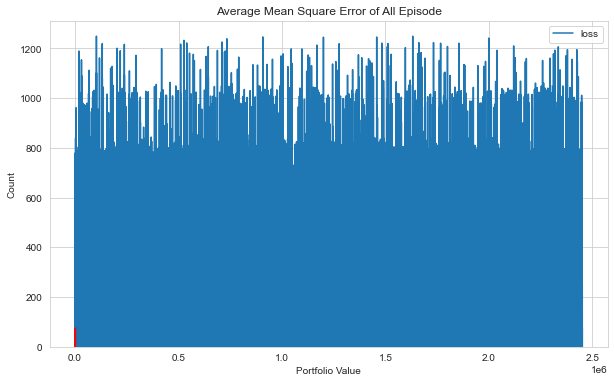

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

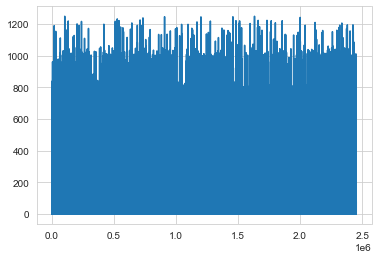

In [5]:
plt.plot(agent.model.losses)

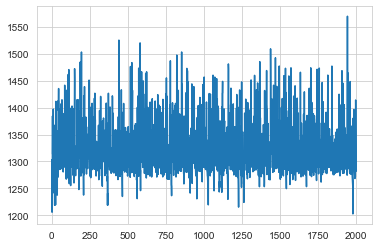

In [6]:
plt.plot(portfolio_value)

episode end value: 1149.83, duration: 0:00:00.144035
Sell: 383 times, Buy: 365 times


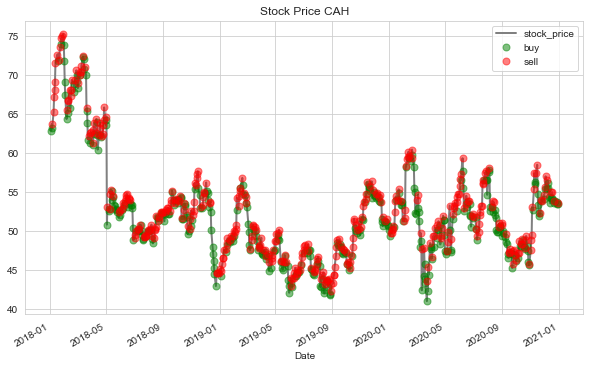

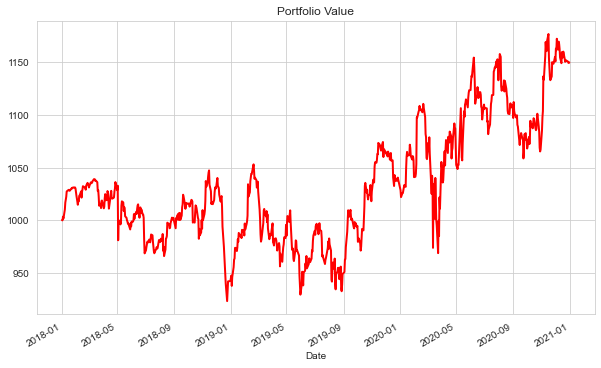

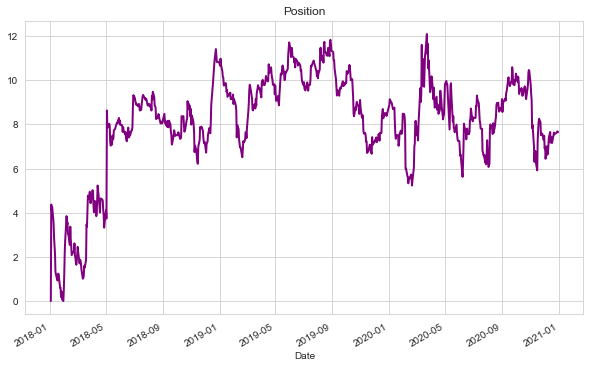

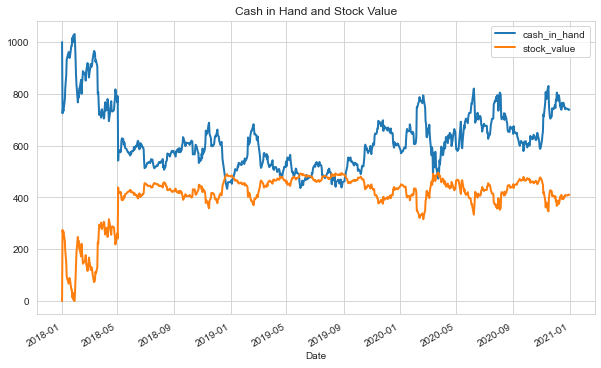

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CAH
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.76 %
Volatility: 0.1483
shape ratio: 0.2471
Maximun drawdown: -12.75 %
Calmar ratio: 0.3736
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -5.38 %
Volatility (benchmark): 0.3713
shape ratio: -0.1746
Maximun drawdown: -45.50 %
Calmar ratio (benchmark): -0.1183


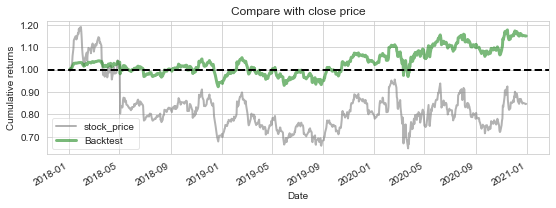

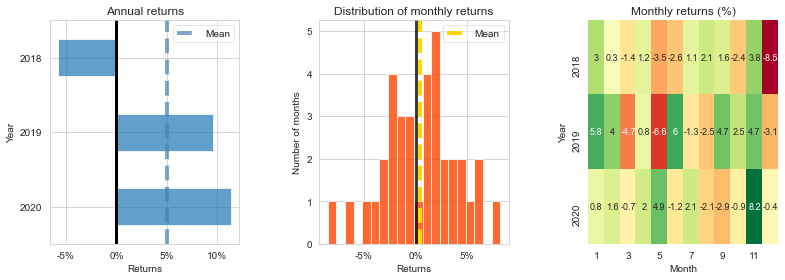

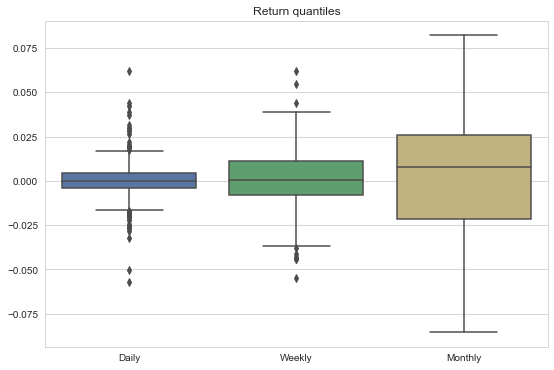

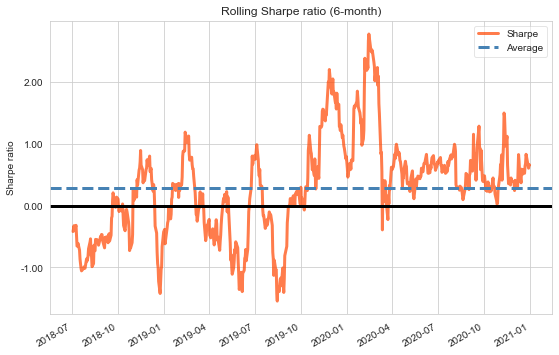

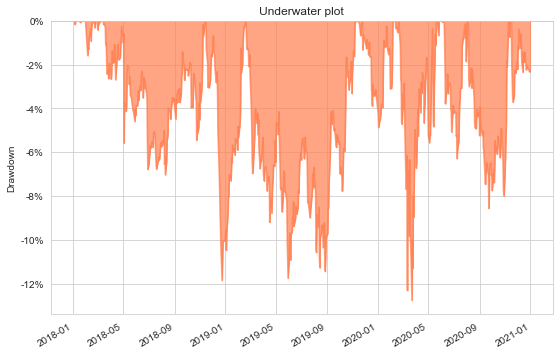

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')